In [1]:
# Import libraries
from pyhdf.SD import SD, SDC
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
# Create a reproducible file path
groundwater_fp = os.path.join("/capstone/aridgw/data/2025_09_21_annual_median_groundwater_levels_16sites.csv")

# Read in data
gw_sites = pd.read_csv(groundwater_fp)

In [46]:
# Read in data from cyber duck
file_path = os.path.join("/capstone/aridgw/data/modis_data/MOD16A3GF.A2018001.h08v05.061.2021364170559.hdf")
hdf = SD(file_path, SDC.READ)

# Print dataset names with their info
datasets = hdf.datasets()
for name, info in datasets.items():
    print(name, info)

ET_500m (('YDim:MOD_Grid_MOD16A3', 'XDim:MOD_Grid_MOD16A3'), (2400, 2400), 23, 0)
LE_500m (('YDim:MOD_Grid_MOD16A3', 'XDim:MOD_Grid_MOD16A3'), (2400, 2400), 22, 1)
PET_500m (('YDim:MOD_Grid_MOD16A3', 'XDim:MOD_Grid_MOD16A3'), (2400, 2400), 23, 2)
PLE_500m (('YDim:MOD_Grid_MOD16A3', 'XDim:MOD_Grid_MOD16A3'), (2400, 2400), 22, 3)
ET_QC_500m (('YDim:MOD_Grid_MOD16A3', 'XDim:MOD_Grid_MOD16A3'), (2400, 2400), 21, 4)


In [47]:
et_data = hdf.select('ET_500m')[:]
print("shape", et_data.shape)
print("attributes", hdf.select('ET_500m').attributes())
print("scale factor", hdf.select('ET_500m').scale_factor)




shape (2400, 2400)
attributes {'long_name': 'MODIS Gridded 500m Annual Evapotranspiration (ET)\x00', '_FillValue': 65535, 'valid_range': [0, 65500], 'units': 'kg/m^2/yr\x00', 'scale_factor': 0.1, 'scale_factor_err': 0.0, 'add_offset': 0.0, 'add_offset_err': 0.0, 'calibrated_nt': 23}
scale factor 0.1


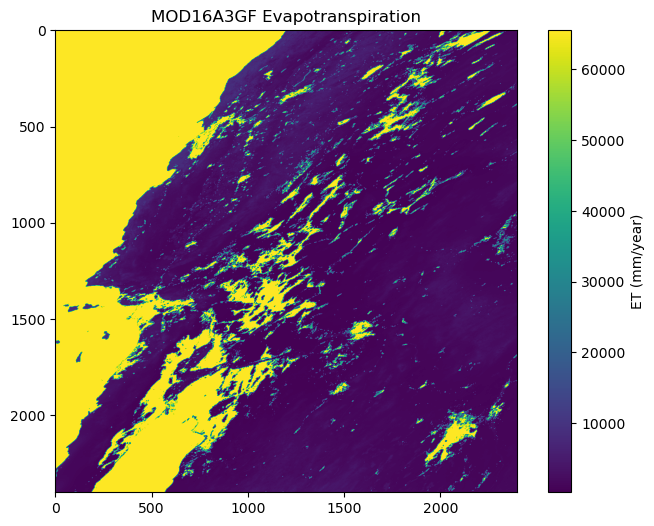

In [48]:
# et_data is your NumPy array from the HDF file
plt.figure(figsize=(8,6))
plt.imshow(et_data, cmap='viridis')
plt.colorbar(label='ET (mm/year)')  # Add correct units
plt.title('MOD16A3GF Evapotranspiration')
plt.show()


In [15]:
# Check which hdf tiles correspond to which well location

# Modis constants
TILE_SIZE = 1111950.0  # meters
X_MIN = -20015109.354
Y_MAX =  10007554.677

from pyproj import CRS, Transformer
import math

# Define projections
wgs84 = CRS.from_epsg(4326)
sinusoidal = CRS.from_proj4(
    "+proj=sinu +R=6371007.181 +nadgrids=@null +wktext"
)

transformer = Transformer.from_crs(wgs84, sinusoidal, always_xy=True)

def latlon_to_modis_tile(lat, lon):
    # Convert lat/lon → sinusoidal meters
    x, y = transformer.transform(lon, lat)

    # Compute tile indices
    h = int(math.floor((x - X_MIN) / TILE_SIZE))
    v = int(math.floor((Y_MAX - y) / TILE_SIZE))

    return f"h{h:02d}v{v:02d}"

# Example of raw function
lat = 30.11149155
lon = 54.35376308

tile = latlon_to_modis_tile(lat, lon)
print(tile)


h22v05


In [ ]:
# Add a new column into `gw_sites` for tile ID to each site

lat = gw_sites["Lat"]
lon = gw_sites["Lon"]

for idx, row in gw_sites.iterrows():
    title = row["Title Location"]
    lat = row["Lat"]
    lon = row["Lon"]

    tile = latlon_to_modis_tile(lat, lon)

    gw_sites.at[idx, "tile_id"] = tile

    print(f"{title}: {tile}")



Northern Saudi Arabia: h21v06
Northern Saudi Arabia: h21v06
Northern Saudi Arabia: h21v06
Northern Saudi Arabia: h21v06
Northern Saudi Arabia: h21v06
Northern Saudi Arabia: h21v06
Northern Saudi Arabia: h21v06
Northern Saudi Arabia: h21v06
Northern Saudi Arabia: h21v06
Northern Saudi Arabia: h21v06
Northern Saudi Arabia: h21v06
Northern Saudi Arabia: h21v06
Northern Saudi Arabia: h21v06
Northern Saudi Arabia: h21v06
Northern Saudi Arabia: h21v06
Northern Saudi Arabia: h21v06
Northern Saudi Arabia: h21v06
Northern Saudi Arabia: h21v06
Northern Saudi Arabia: h21v06
Northern Saudi Arabia: h21v06
Northern Saudi Arabia: h21v06
Northern Saudi Arabia: h21v06
Northern Saudi Arabia: h21v06
Northern Saudi Arabia: h21v06
Northern Saudi Arabia: h21v06
Northern Saudi Arabia: h21v06
Northern Saudi Arabia: h21v06
Northern Saudi Arabia: h21v06
Northern Saudi Arabia: h21v06
Northern Saudi Arabia: h21v06
Northern Saudi Arabia: h21v06
Northern Saudi Arabia: h21v06
central Saudi Arabia (near Al Duwadimi):

In [ ]:
# Make a CSV out of gw_sites and add it to my enviorment
#gw_sites.to_csv("gw_sites.csv", index=False)

In [18]:
# Remove duplicates
gw_sites_no_dupl = gw_sites.drop_duplicates(subset=['Lat'])
gw_sites_no_dupl

,MEDS_ID,MEDS_ANNUAL_MEDIAN_ROW,YEAR,WaterLevel_m,WaterLevelElev_masl,Title Location,Lat,Lon,tile_id
0,1,2,1982,91.100000,NaN,Northern Saudi Arabia,29.886111,39.372222,h21v06
32,2,34,1981,123.000000,NaN,central Saudi Arabia (near Al Duwadimi),24.681514,44.697424,h22v06
67,3,69,1977,19.316500,NaN,central Saudi Arabia (recovery near Al Kharj),24.080000,47.200000,h22v06
112,4,114,1986,7.455000,NaN,Iran (east-central) Bahadoran Basin,31.394719,54.902616,h22v05
141,5,143,1978,18.580000,NaN,Iran (north) West Qazvin Plain,36.033337,49.708099,h22v05
180,6,182,1986,4.350000,NaN,Iran (south-central Harat Basin),30.111492,54.353763,h22v05
214,7,216,1953,31.699200,NaN,Nevada (Amargosa),36.556340,-116.496000,h08v05
279,8,281,1953,13.045440,NaN,Arizona (Willcox Basin),32.036190,-109.754000,h08v05
333,9,335,1999,NaN,270.9207,LibyaTazerbo,25.429840,21.574230,h19v06
353,10,355,1988,65.935120,NaN,JordanAmmanZarqa,32.130820,36.238040,h21v05


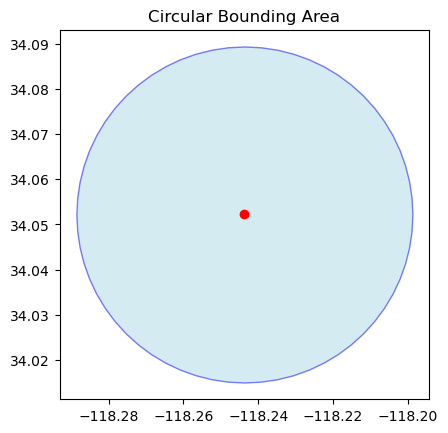

In [ ]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Example: Create a circular bounding area around a point
def create_circle_bounding_box(center_lat, center_lon, radius_meters):
    """
    Create a circular bounding area (buffer) around a given lat/lon point.
    
    Args:
        center_lat (float): Latitude of the center point.
        center_lon (float): Longitude of the center point.
        radius_meters (float): Radius of the circle in meters.
    
    Returns:
        GeoSeries: A GeoSeries containing the circular polygon.
    """
    # Create a GeoSeries with the point in WGS84 (EPSG:4326)
    point = gpd.GeoSeries([Point(center_lon, center_lat)], crs="EPSG:4326")
    
    # Project to a local metric CRS for accurate distance buffering
    point_projected = point.to_crs(epsg=3857)  # Web Mercator (meters)
    
    # Create buffer (circle) in meters
    circle = point_projected.buffer(radius_meters)
    
    # Convert back to WGS84 for mapping
    circle_wgs84 = circle.to_crs(epsg=4326)
    
    return circle_wgs84




# Example usage
center_lat = 34.0522   # Example: Los Angeles
center_lon = -118.2437
radius_meters = 5000   # 5 km

circle_geom = create_circle_bounding_box(center_lat, center_lon, radius_meters)

# Plot the circle
fig, ax = plt.subplots()
circle_geom.plot(ax=ax, color='lightblue', edgecolor='blue', alpha=0.5)
gpd.GeoSeries([Point(center_lon, center_lat)], crs="EPSG:4326").plot(ax=ax, color='red')
plt.title("Circular Bounding Area")
plt.show()


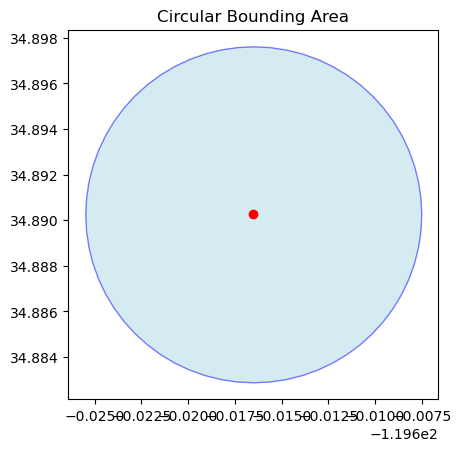

In [ ]:

center_lat = 34.890255 
center_lon = -119.616517
radius_meters = 1000   # 5 km

circle_geom = create_circle_bounding_box(center_lat, center_lon, radius_meters)

# Plot the circle
fig, ax = plt.subplots()
circle_geom.plot(ax=ax, color='lightblue', edgecolor='blue', alpha=0.5)
gpd.GeoSeries([Point(center_lon, center_lat)], crs="EPSG:4326").plot(ax=ax, color='red')
plt.title("Circular Bounding Area")
plt.show()


In [ ]:
from rasterio.transform import from_origin
from pyproj import CRS

TILE_SIZE = 1111950.0
PIXELS = et_data.shape[0]
RES = TILE_SIZE / PIXELS

X_MIN = -20015109.354
Y_MAX = 10007554.677

h = 8   # from filename h08v05
v = 5

x_ul = X_MIN + h * TILE_SIZE
y_ul = Y_MAX - v * TILE_SIZE

transform = from_origin(x_ul, y_ul, RES, RES)

modis_crs = CRS.from_proj4("+proj=sinu +R=6371007.181 +nadgrids=@null +wktext")


In [57]:
circle_geom = circle_geom.to_crs(modis_crs)

from rasterio.io import MemoryFile
from rasterio.mask import mask
import numpy as np

profile = {
    "driver": "GTiff",
    "height": et_data.shape[0],
    "width": et_data.shape[1],
    "count": 1,
    "dtype": "float32",
    "crs": modis_crs,
    "transform": transform,
    "nodata": np.nan
}

with MemoryFile() as memfile:
    with memfile.open(**profile) as dataset:
        dataset.write(et_data.astype("float32"), 1)
        clipped, _ = mask(dataset, circle_geom.geometry, crop=True)


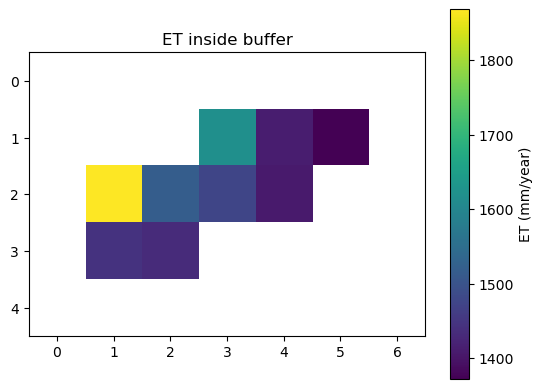

In [58]:
plt.imshow(clipped[0], cmap="viridis")
plt.colorbar(label="ET (mm/year)")
plt.title("ET inside buffer")
plt.show()
